In [1]:
import sys
import importlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
# make the module available from the src directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from src.dataLoaders.PatientDataLoader import PatientDataProcessor
importlib.reload(sys.modules['src.dataLoaders.PatientDataLoader'])

<module 'src.dataLoaders.PatientDataLoader' from '/Users/mraabo/computer_science/year_3/bachelor/XAI-in-Medical-Image-Analysis/src/dataLoaders/PatientDataLoader.py'>

In [3]:
meta_folder = 'OAIData21/'
data_path = '../datasets/meta_data/' + meta_folder

cartilage_featues = [
    "BLFMTH",    # Mean Cartilage Thickness (Central Lateral Femur) - 
    "BMFMTH",    # Mean Cartilage Thickness (Central Medial Femur)
    "WLTMTH",    # Mean Cartilage Thickness (Lateral Tibia)
    "WMTMTH",    # Mean Cartilage Thickness (Medial Tibia) - 
]

all_clinical_features = [
    "WOMKPR",   # WOMAC Pain score (0-20) Right
    "WOMKPL",   # WOMAC Pain score (0-20) Left
    "AGE",      # Age
]

processor = PatientDataProcessor(base_path=data_path)
# processor.create_meta_data_for_visit(visit_no=visit)
processor.load_all_visits()
first_visit_clinical_data = processor.get_all_clinical_data()[["V00" + label for label in all_clinical_features]]
kmri_data = processor. load_all_kMRI_data(labels = cartilage_featues)
joined_data = pd.merge(first_visit_clinical_data, kmri_data, right_index=True, left_index=True)
first_visit_data = joined_data.filter(like='V00', axis=1)

Loading kMRI data for visit V00
object
Length of the dataframe: 329
Length of the dataframe: 329
Loading kMRI data for visit V01
object
Length of the dataframe: 227
Length of the dataframe: 227
Loading kMRI data for visit V02
No file found at:  ../datasets/meta_data/OAIData21//kMRI_QCart_Eckstein02.txt skipping.
Length of the dataframe: 0
Loading kMRI data for visit V03
object
Length of the dataframe: 189
Length of the dataframe: 189
Loading kMRI data for visit V04
No file found at:  ../datasets/meta_data/OAIData21//kMRI_QCart_Eckstein04.txt skipping.
Length of the dataframe: 0
Loading kMRI data for visit V05
object
Length of the dataframe: 20
Length of the dataframe: 20
Loading kMRI data for visit V06
object
Length of the dataframe: 45
Length of the dataframe: 45
Loading kMRI data for visit V07
No file found at:  ../datasets/meta_data/OAIData21//kMRI_QCart_Eckstein07.txt skipping.
Length of the dataframe: 0
Loading kMRI data for visit V08
No file found at:  ../datasets/meta_data/OAIDa

/Users/mraabo/computer_science/year_3/bachelor/XAI-in-Medical-Image-Analysis/src/dataLoaders/PatientDataLoader.py:172: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.enroll_df = df_enroll[['P02SEX']].replace(
/Users/mraabo/computer_science/year_3/bachelor/XAI-in-Medical-Image-Analysis/src/dataLoaders/PatientDataLoader.py:311: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method

Loading kMRI data for visit V00
object
Length of the dataframe: 329
Loading kMRI data for visit V01
object
Length of the dataframe: 227
Loading kMRI data for visit V02
No file found at:  ../datasets/meta_data/OAIData21//kMRI_QCart_Eckstein02.txt skipping.
Loading kMRI data for visit V03
object
Length of the dataframe: 189
Loading kMRI data for visit V04
No file found at:  ../datasets/meta_data/OAIData21//kMRI_QCart_Eckstein04.txt skipping.
Loading kMRI data for visit V05
object
Length of the dataframe: 20
Loading kMRI data for visit V06
object
Length of the dataframe: 45
Loading kMRI data for visit V07
No file found at:  ../datasets/meta_data/OAIData21//kMRI_QCart_Eckstein07.txt skipping.
Loading kMRI data for visit V08
No file found at:  ../datasets/meta_data/OAIData21//kMRI_QCart_Eckstein08.txt skipping.
Loading kMRI data for visit V09
No file found at:  ../datasets/meta_data/OAIData21//kMRI_QCart_Eckstein09.txt skipping.
Loading kMRI data for visit V10
No file found at:  ../datasets

/Users/mraabo/computer_science/year_3/bachelor/XAI-in-Medical-Image-Analysis/src/dataLoaders/PatientDataLoader.py:172: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.enroll_df = df_enroll[['P02SEX']].replace(
/Users/mraabo/computer_science/year_3/bachelor/XAI-in-Medical-Image-Analysis/src/dataLoaders/PatientDataLoader.py:311: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method

# Summary Statistics

In [4]:
first_visit_data.describe()

,V00WOMKPR,V00WOMKPL,V00AGE,V00BLFMTHL,V00BMFMTHL,V00WLTMTHL,V00WMTMTHL,V00BLFMTHR,V00BMFMTHR,V00WLTMTHR,V00WMTMTHR
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,328.000000,329.000000,328.000000,329.000000
mean,3.620061,4.149848,62.632219,1.908485,1.577031,1.854627,1.588260,1.871593,1.638326,1.896293,1.638395
std,3.457498,4.085557,9.071951,0.384725,0.561875,0.472700,0.374595,0.402717,0.505851,0.469563,0.322747
min,0.000000,0.000000,45.000000,0.254000,0.133000,0.069000,0.340000,0.207000,0.307500,0.270000,0.738100
25%,1.000000,1.000000,56.000000,1.663000,1.236667,1.599700,1.333000,1.625212,1.382700,1.618500,1.427500
50%,3.000000,3.000000,63.000000,1.879400,1.621500,1.868000,1.588000,1.875125,1.669500,1.943750,1.642333
75%,6.000000,6.000000,71.000000,2.145000,1.928000,2.146000,1.855000,2.109625,1.951000,2.192000,1.857000
max,19.000000,20.000000,79.000000,3.071000,3.134900,3.269600,2.688600,2.957000,3.319000,2.996000,2.539000


# Visualization

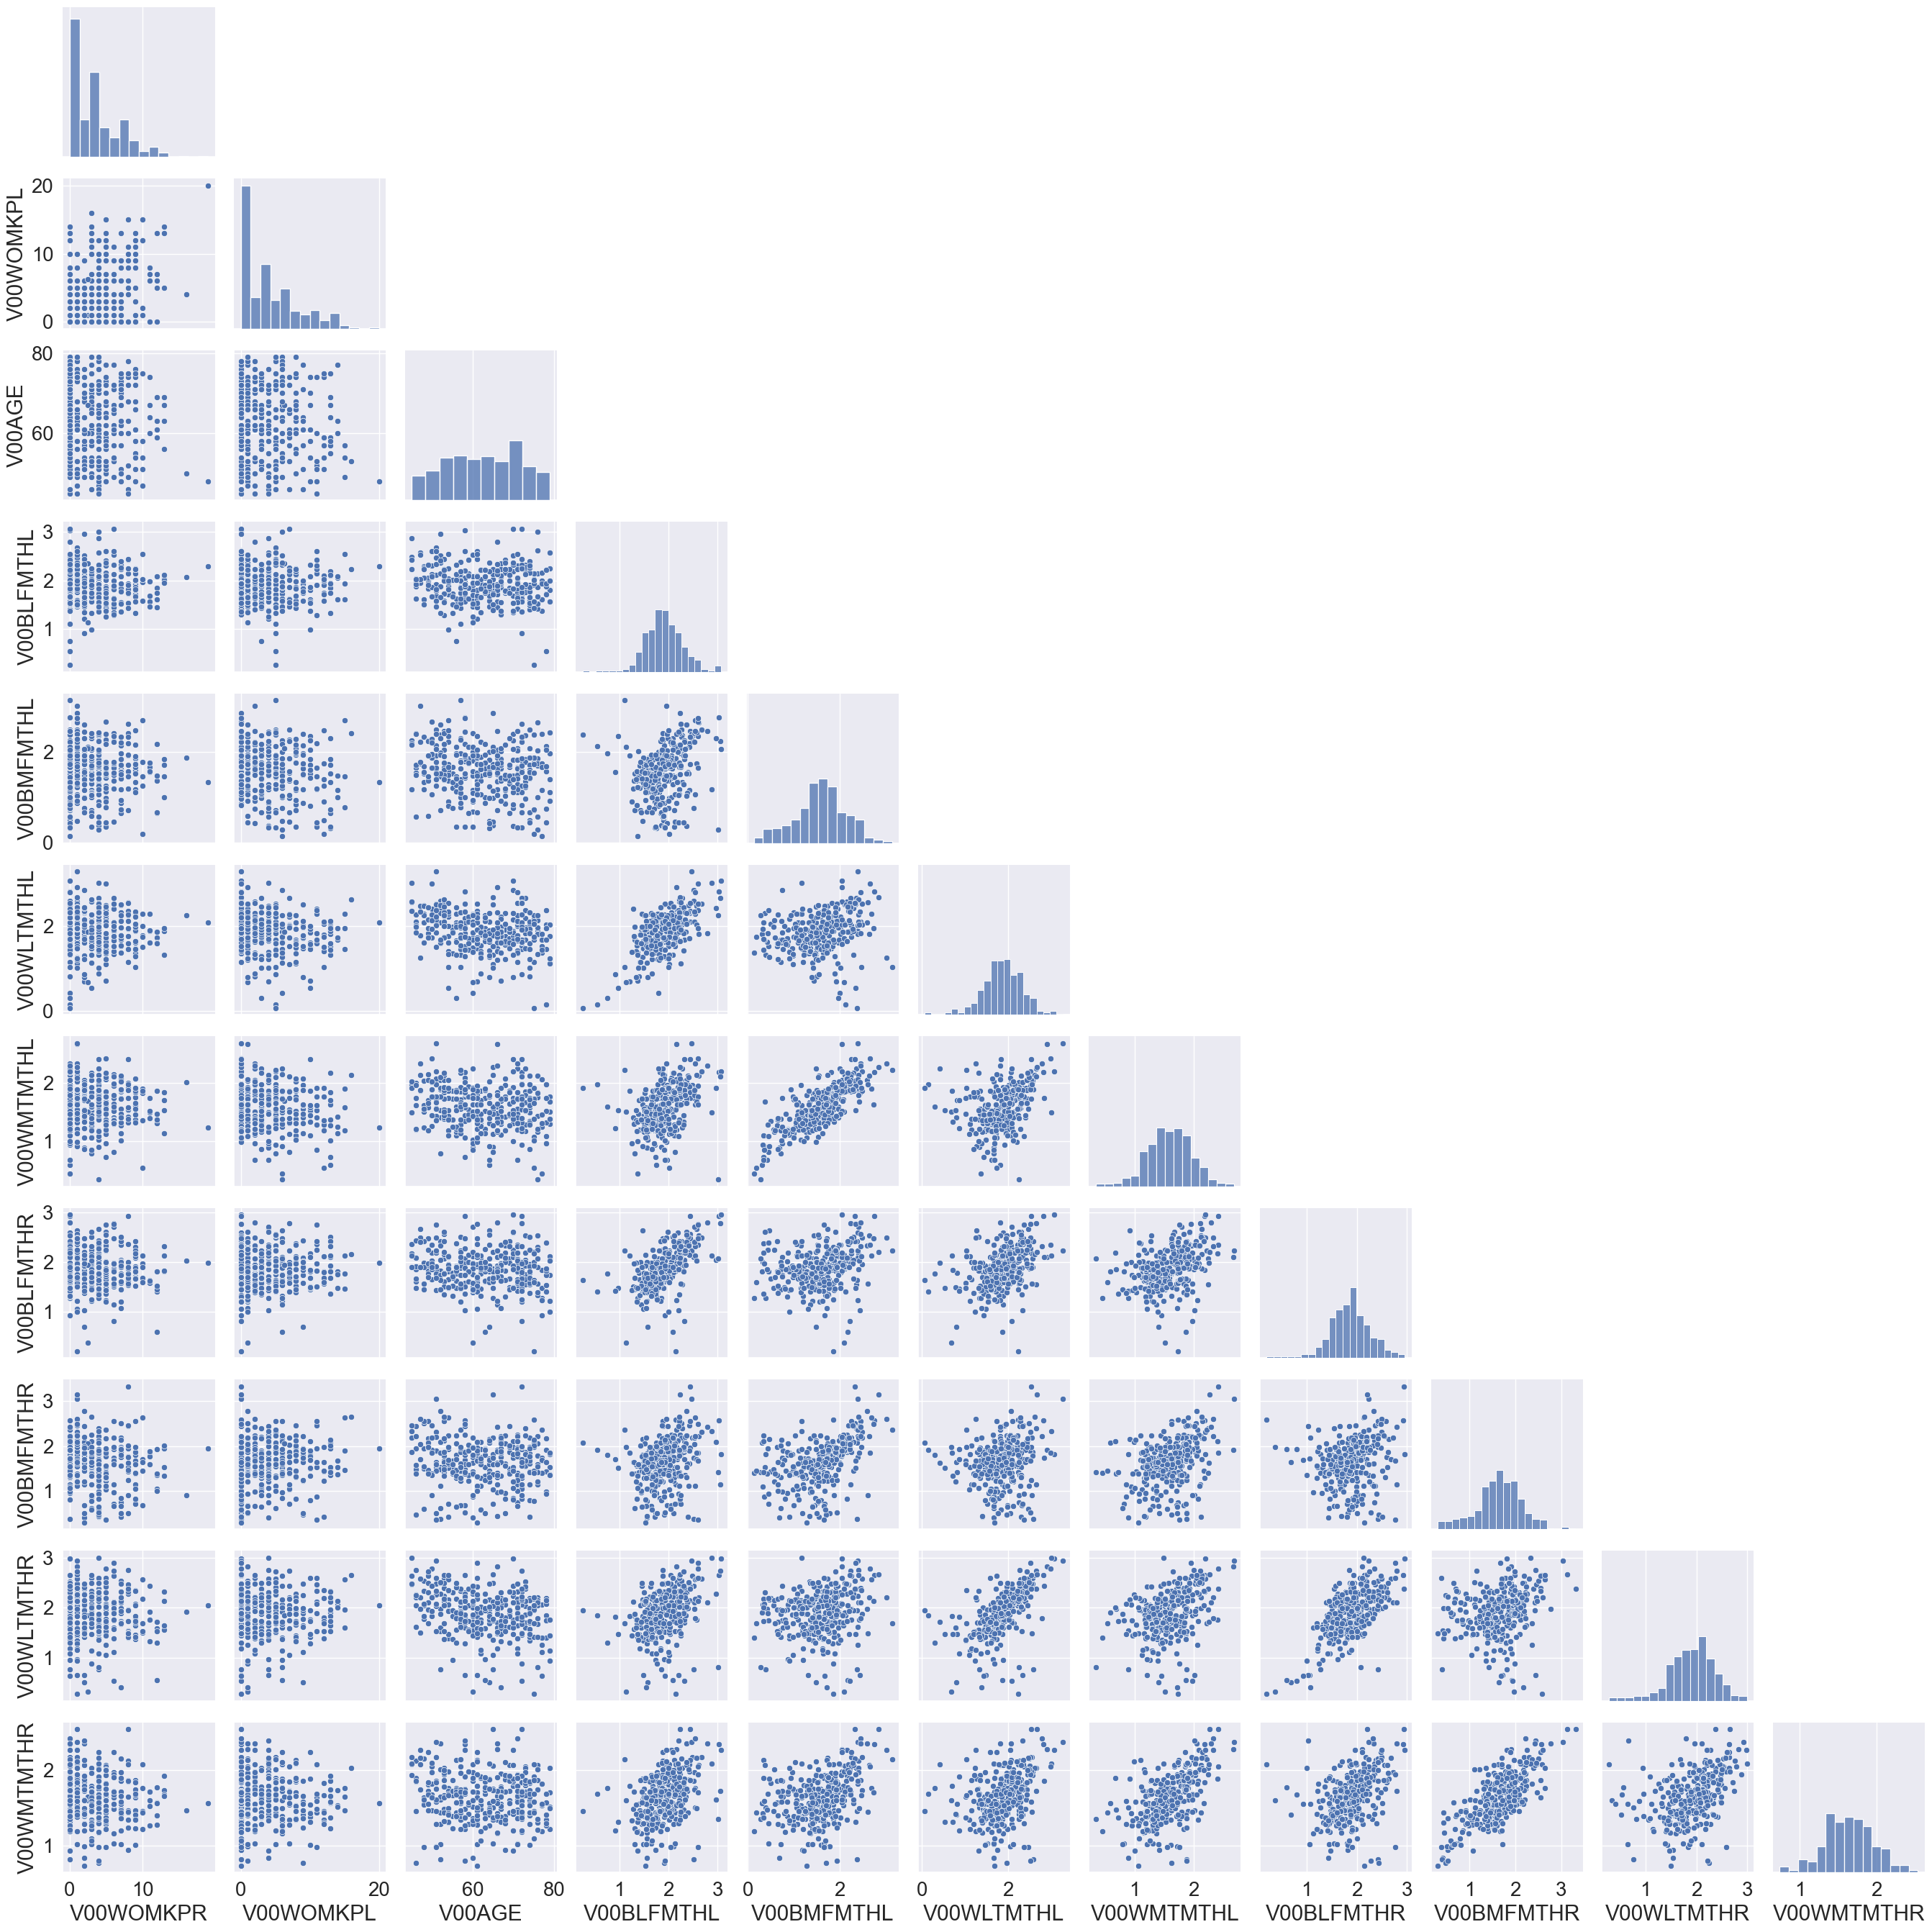

In [13]:
sns.set(font_scale=1.8)
sns.pairplot(first_visit_data, corner=True)
plt.show()

# Correlation Analysis

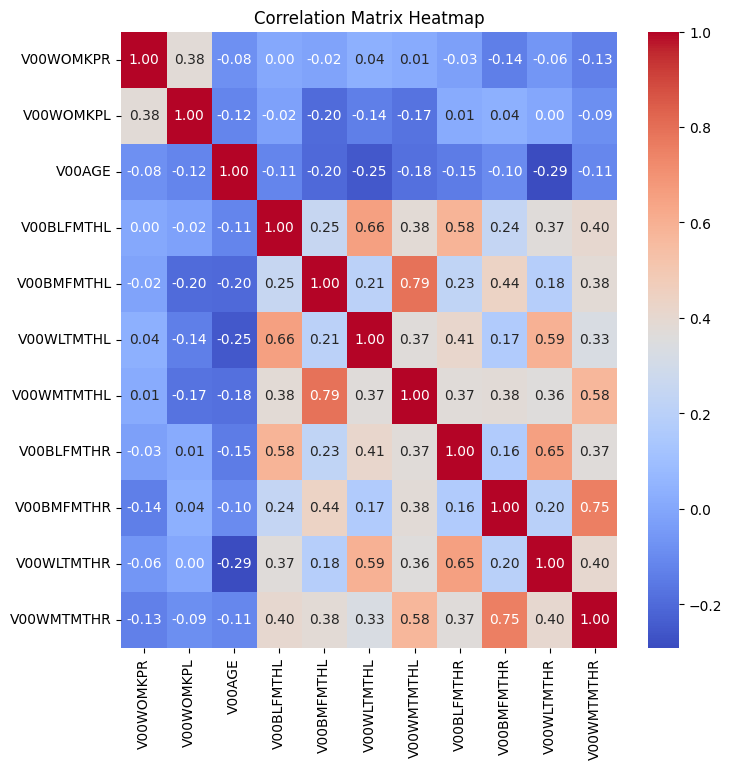

In [6]:
plt.figure(figsize=(8, 8))
correlation_matrix = first_visit_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()